# Inspect cross-validation results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

plt.style.use("huddlej")

In [2]:
def matthews_correlation_coefficient(tp, tn, fp, fn):
    """Return Matthews correlation coefficient for values from a confusion matrix.
    Implementation is based on the definition from wikipedia:

    https://en.wikipedia.org/wiki/Matthews_correlation_coefficient
    """
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
            denominator = 1

    return float(numerator) / denominator

def accuracy(tp, tn, fp, fn):
    return (tp + tn) / float(tp + tn + fp + fn)

In [3]:
df = pd.read_table("lbi_results.tsv")

In [4]:
df

,fn,fp,last_training_timepoint,mae,parameters,test_timepoint,testing_accuracy,testing_correlation,tn,tp,training_accuracy,training_correlation,training_windows,predictors
0,0,9,2011.25,0.288974,0.198538,2012.25,0.685994,0.838357,16,25,0.428682,0.286857,9,lbi
1,0,2,2011.75,0.260716,0.174540,2012.75,0.936927,0.876398,33,27,0.421206,0.263155,10,lbi
2,1,0,2012.25,0.119476,0.435214,2013.25,0.956365,0.861505,15,40,0.494953,0.407854,11,lbi
3,10,21,2012.75,0.128511,0.633021,2013.75,-0.401610,-0.688850,0,21,0.556773,0.517010,12,lbi
4,4,24,2013.25,0.278379,0.673323,2014.25,-0.235865,-0.519599,6,5,0.596581,0.532318,13,lbi
5,4,20,2013.75,0.527373,0.645223,2014.75,0.055279,0.063667,8,13,0.525425,0.497409,14,lbi
6,0,3,2014.25,0.119241,0.623342,2015.25,0.868496,0.778727,22,18,0.474332,0.449229,15,lbi
7,4,29,2014.75,0.105612,0.563209,2015.75,-0.766667,-0.540140,1,1,0.445766,0.400737,16,lbi
8,3,14,2015.25,0.100478,0.599538,2016.25,0.183394,0.633969,9,11,0.464800,0.415988,17,lbi
9,6,18,2015.75,0.073602,0.596998,2016.75,-0.242761,0.632393,1,20,0.421510,0.411098,18,lbi


In [5]:
confusion_matrix = df.loc[:, ["tn", "tp", "fn", "fp"]].sum()

In [6]:
confusion_matrix

tn    114
tp    210
fn     32
fp    152
dtype: int64

In [7]:
matthews_correlation_coefficient(**confusion_matrix.to_dict())

0.32704544087523385

In [8]:
accuracy(**confusion_matrix.to_dict())

0.6377952755905512

In [9]:
df["parameters"]

0     0.198538
1     0.174540
2     0.435214
3     0.633021
4     0.673323
5     0.645223
6     0.623342
7     0.563209
8     0.599538
9     0.596998
10    0.574206
Name: parameters, dtype: float64

In [23]:
df.loc[:, ["parameters", "testing_accuracy", "testing_correlation", "mae"]].aggregate(["mean", "median", "std"])

,parameters,testing_accuracy,testing_correlation,mae
mean,0.519741,0.219606,0.309952,0.197232
median,0.596998,0.183394,0.632393,0.128511
std,0.175946,0.594023,0.618762,0.133723


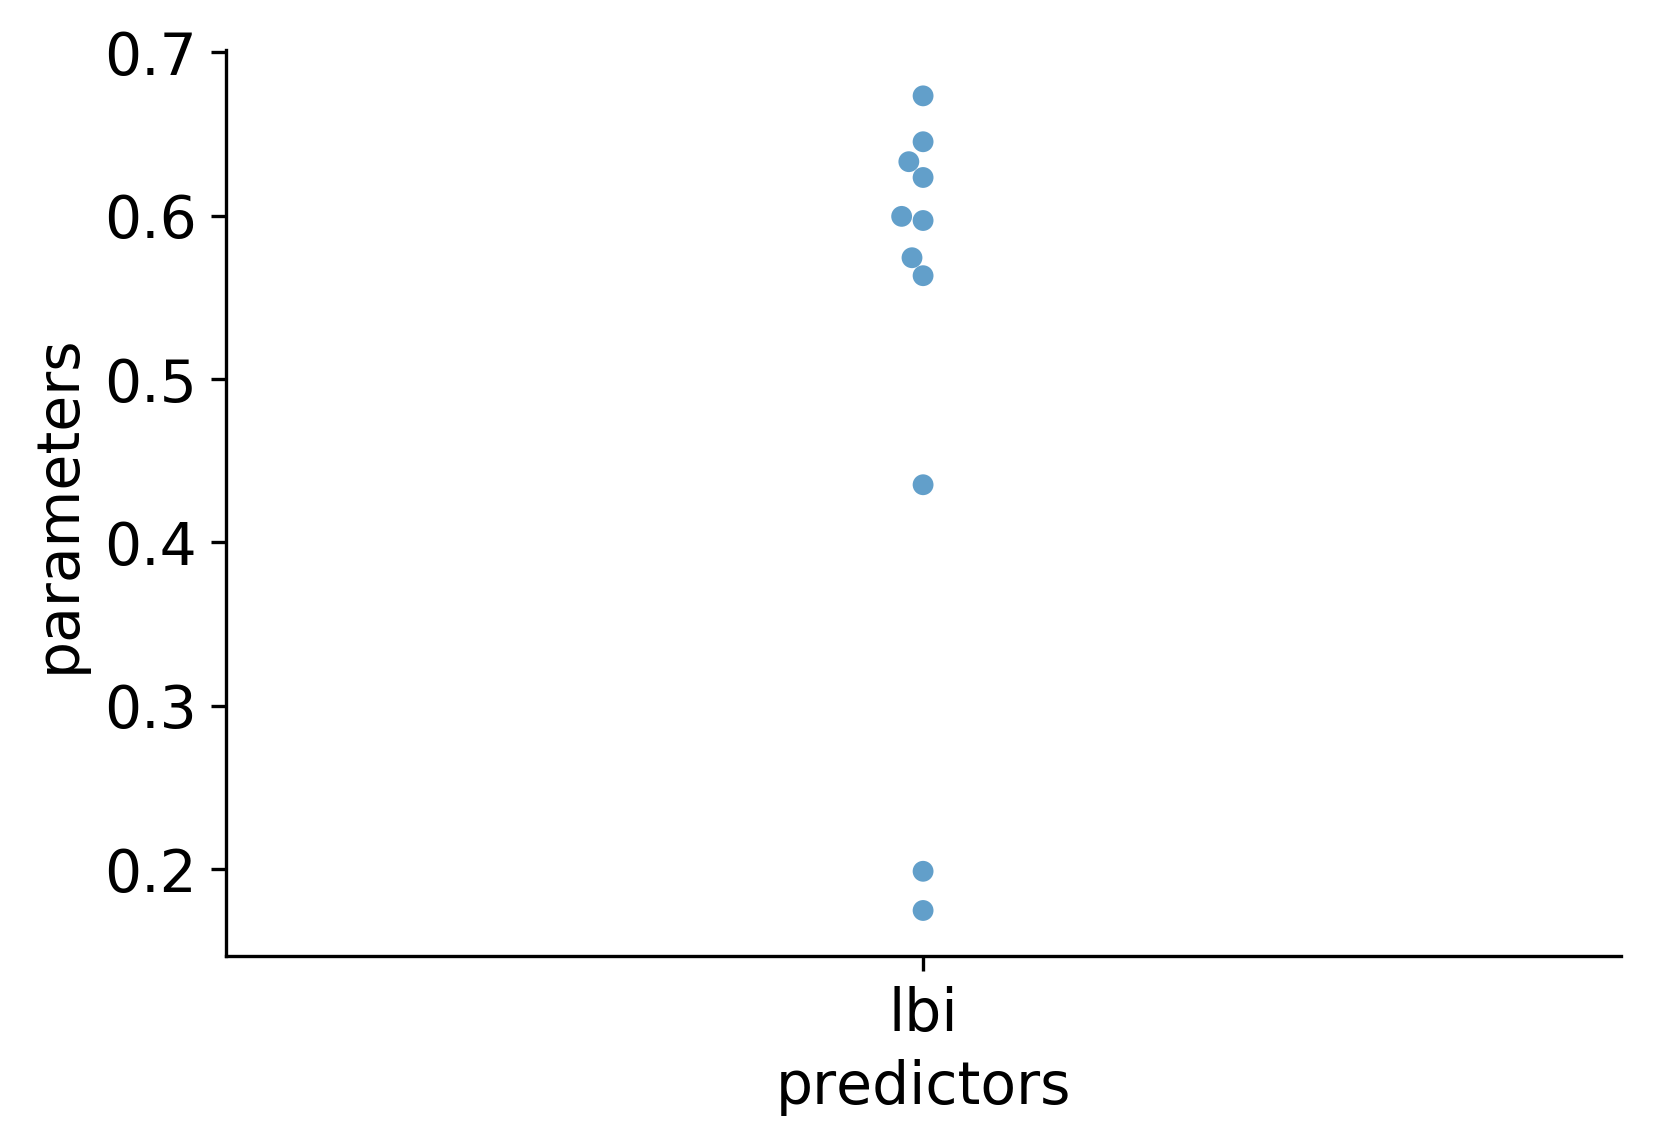

In [11]:
sns.swarmplot(x="predictors", y="parameters", data=df, alpha=0.7)

(-1, 1)

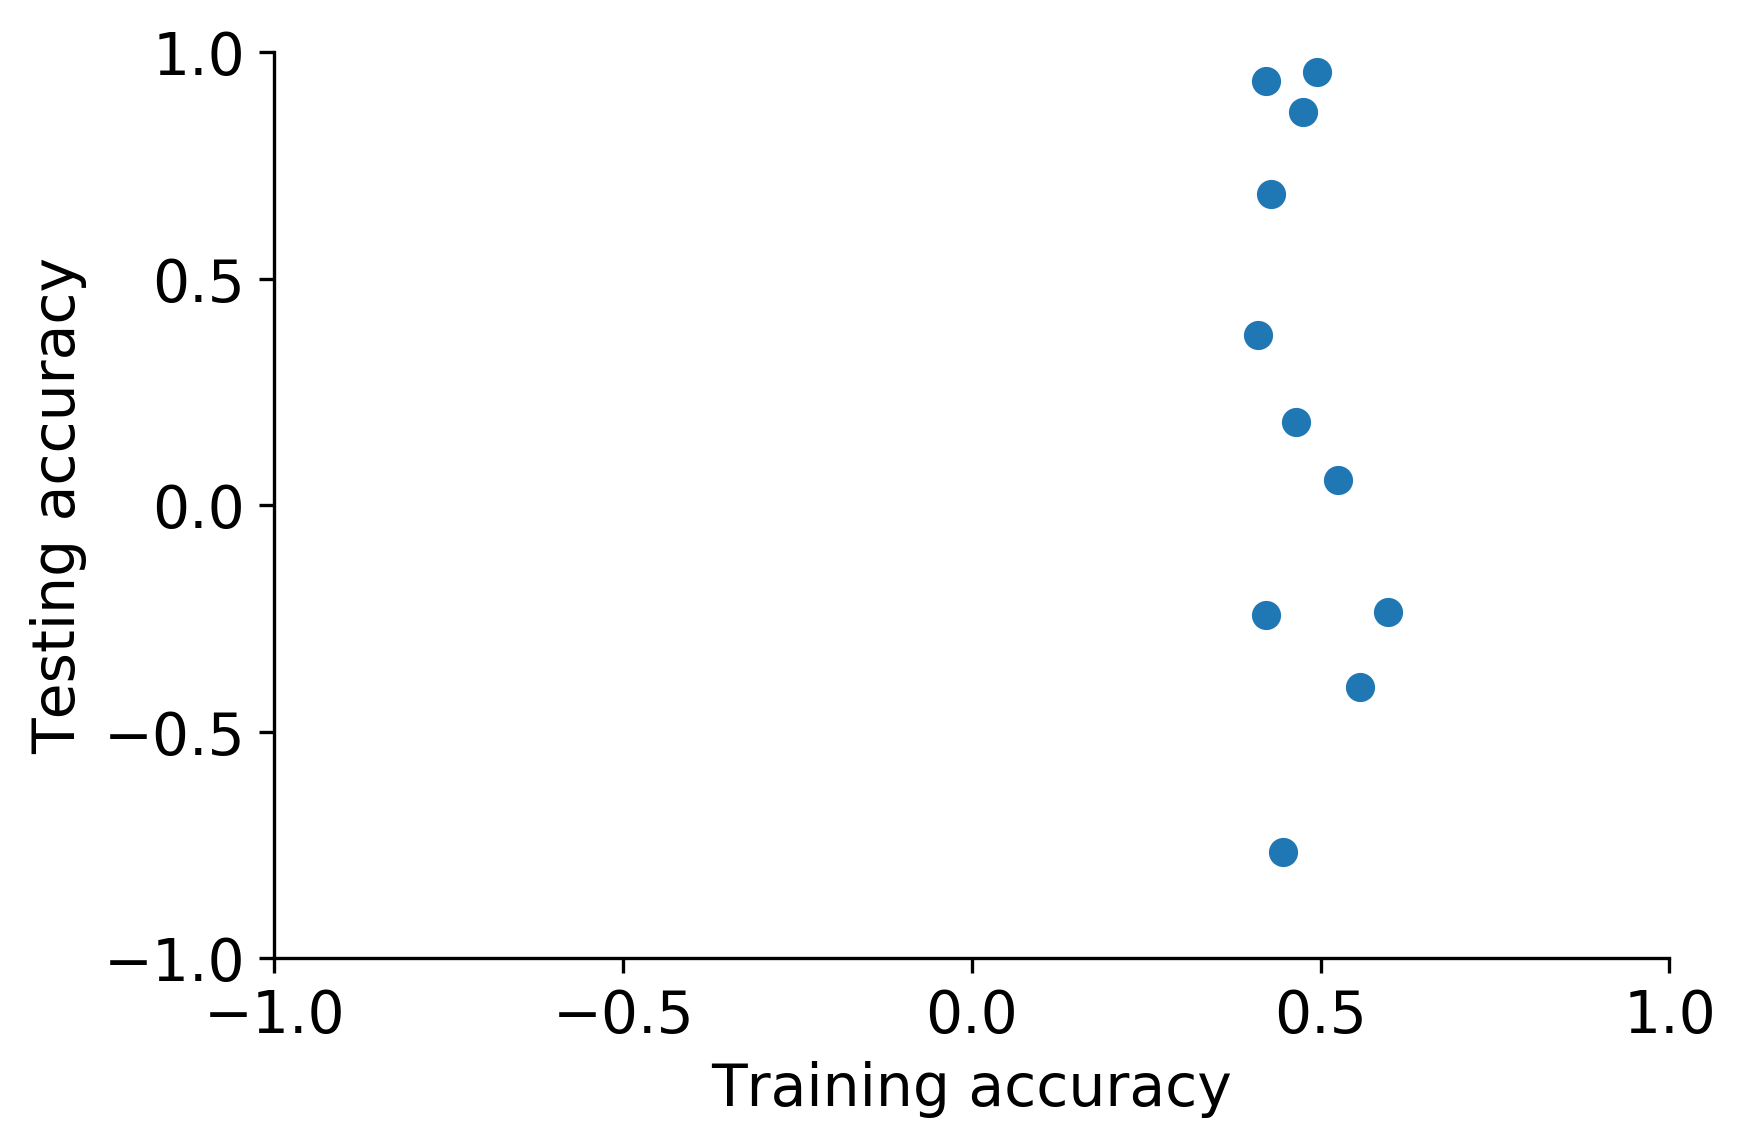

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["training_accuracy"], df["testing_accuracy"])
ax.set_xlabel("Training accuracy")
ax.set_ylabel("Testing accuracy")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

(-1, 1)

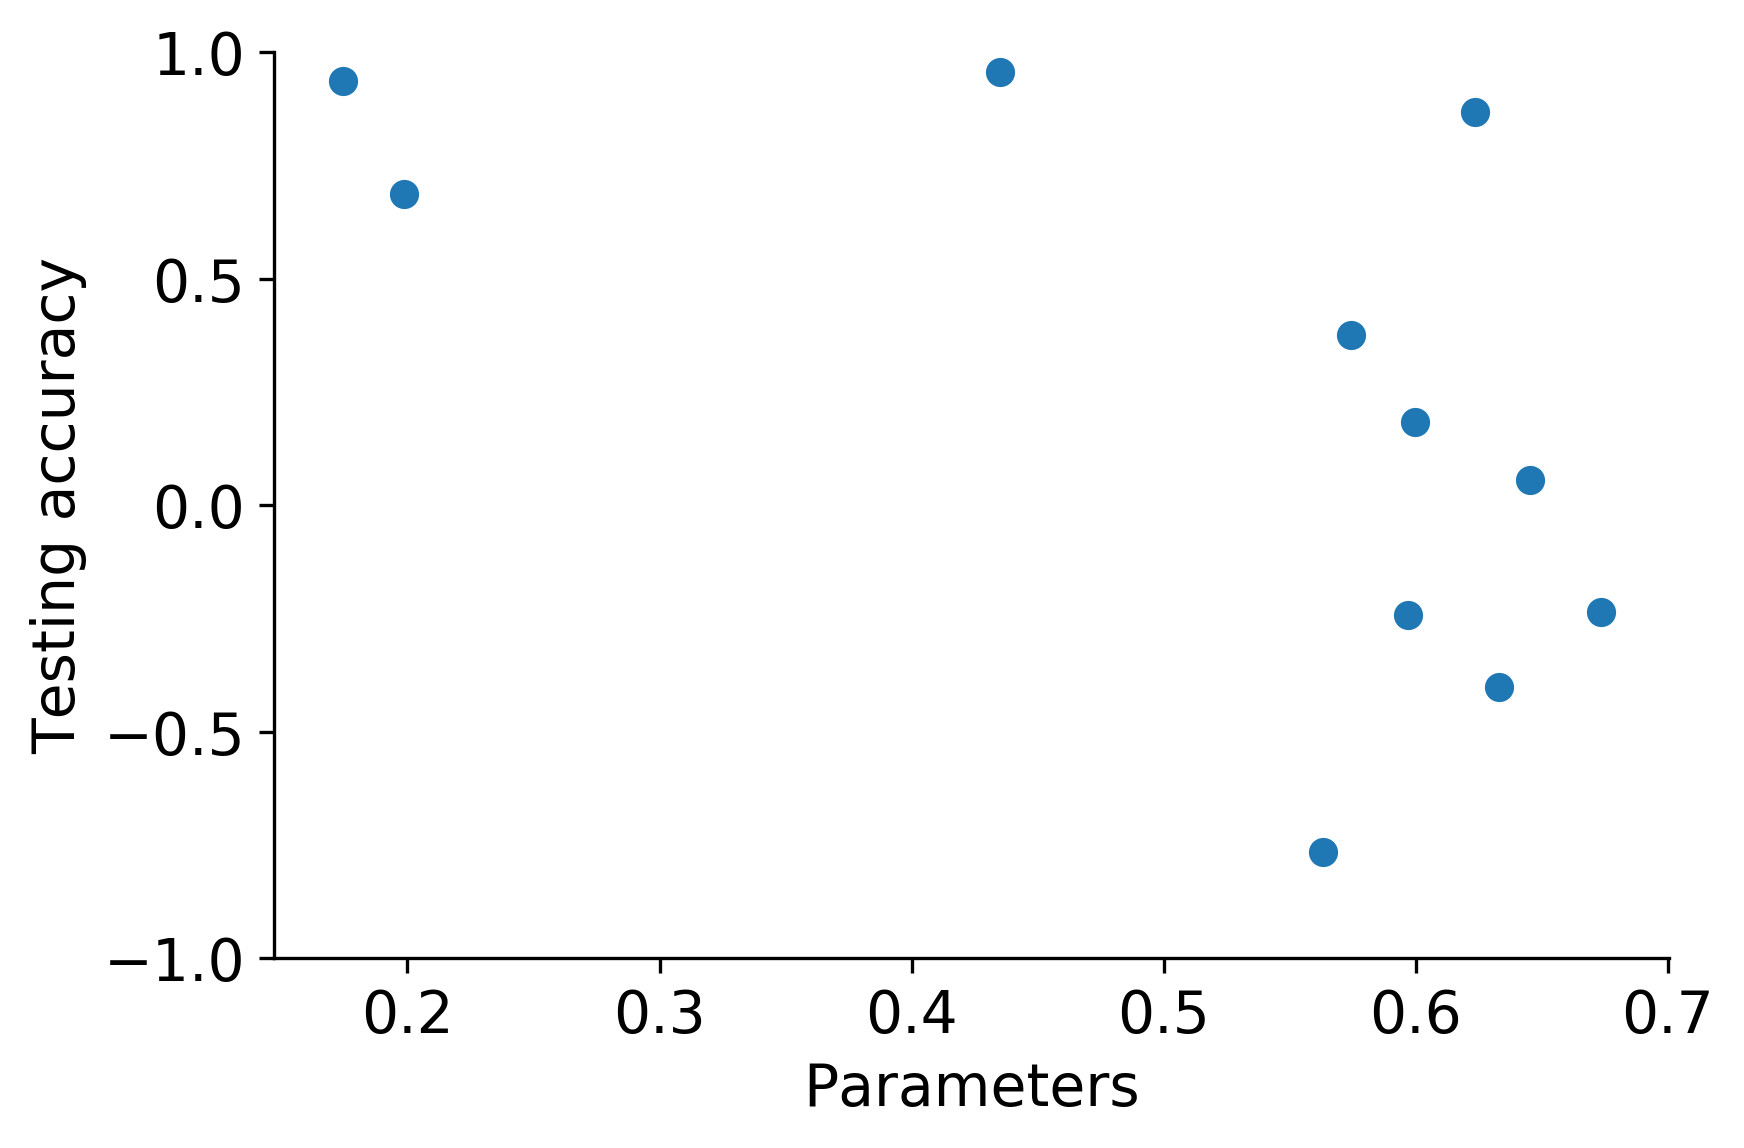

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["parameters"], df["testing_accuracy"])
ax.set_xlabel("Parameters")
ax.set_ylabel("Testing accuracy")
#ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

(-1, 1)

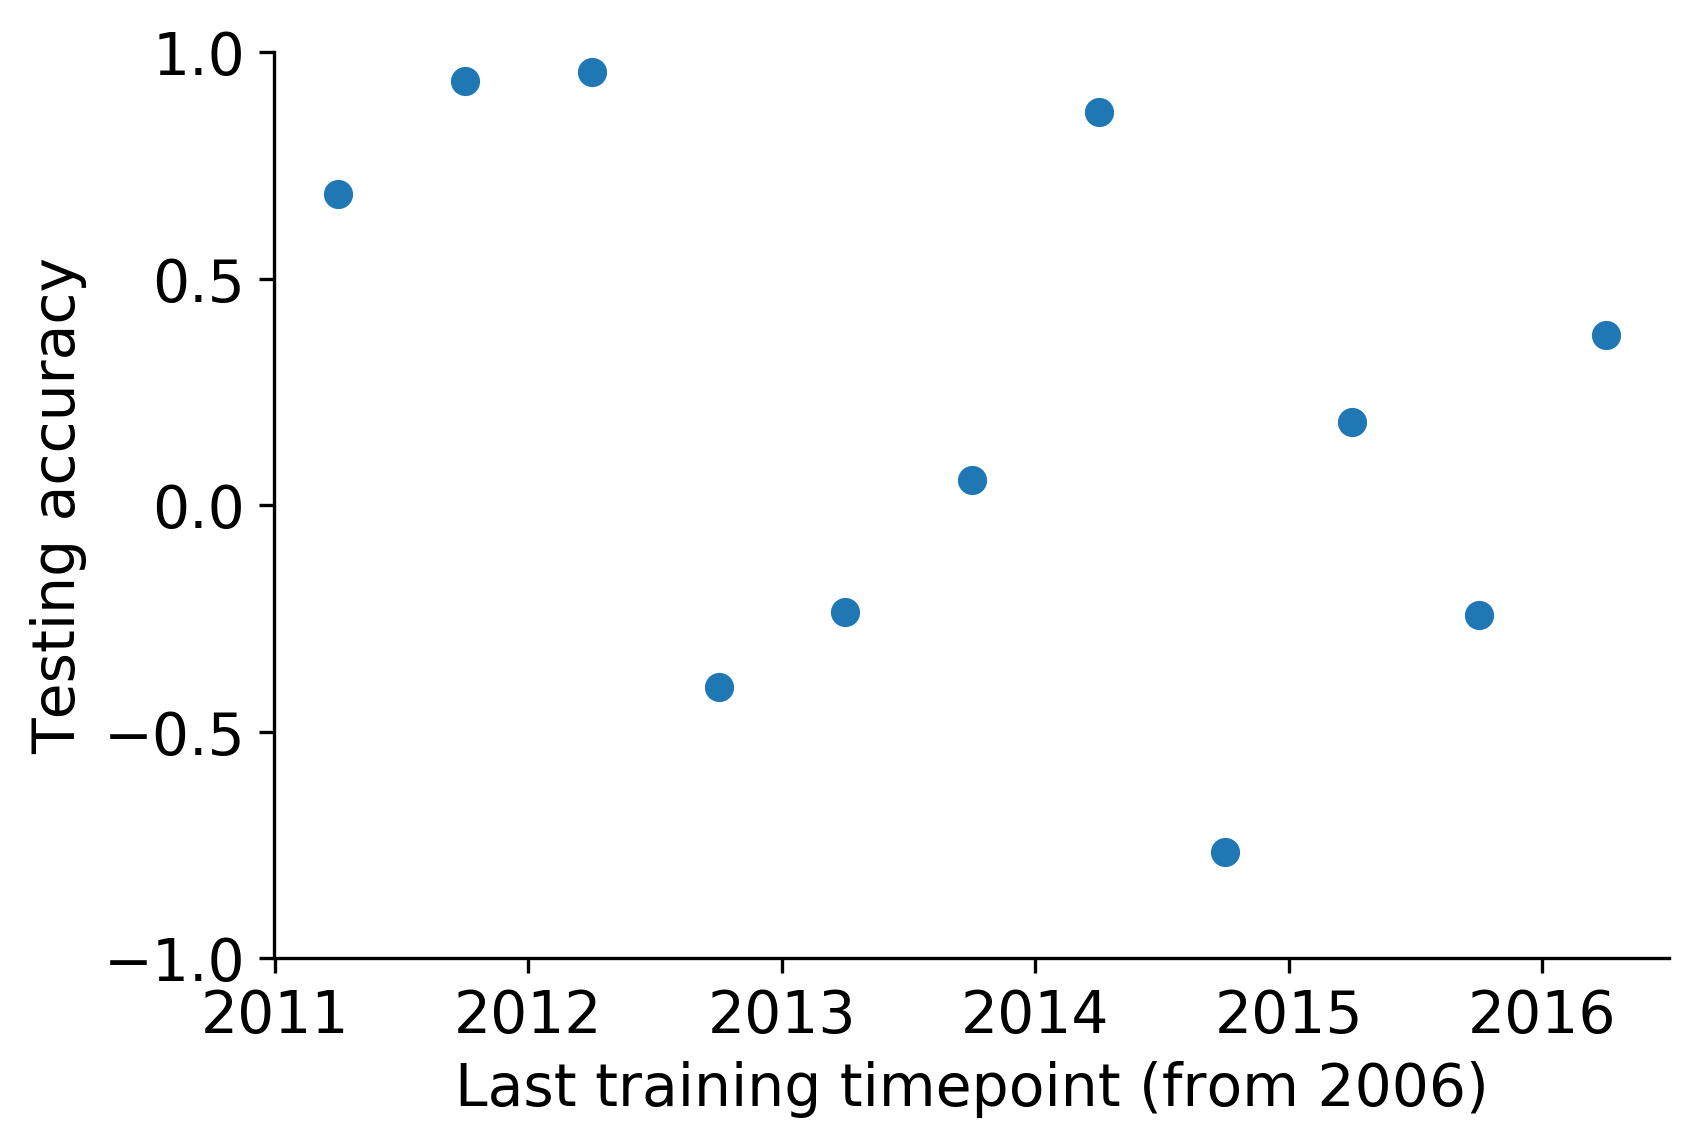

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["last_training_timepoint"], df["testing_accuracy"])
ax.set_xlabel("Last training timepoint (from 2006)")
ax.set_ylabel("Testing accuracy")
#ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

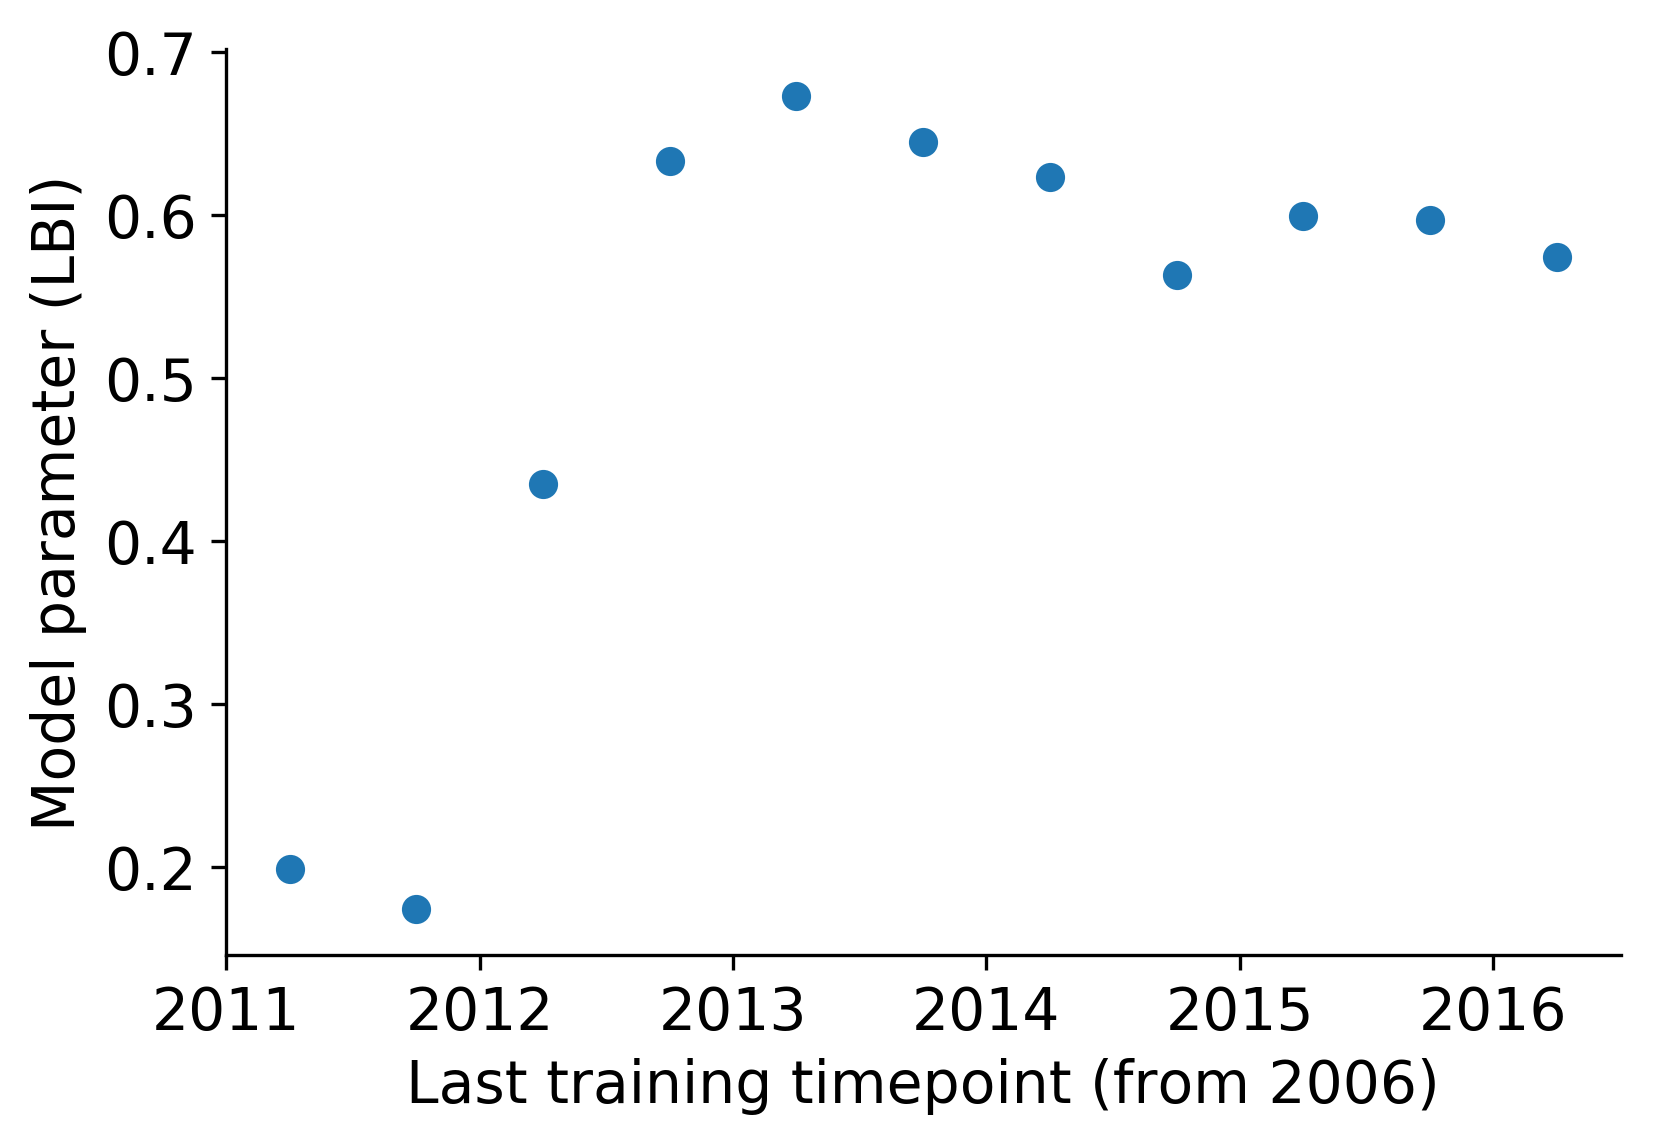

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["last_training_timepoint"], df["parameters"])
ax.set_xlabel("Last training timepoint (from 2006)")
ax.set_ylabel("Model parameter (LBI)")

In [16]:
df["season"] = df["test_timepoint"].apply(lambda timepoint: timepoint % 1 == 0.75 and "winter" or "summer")

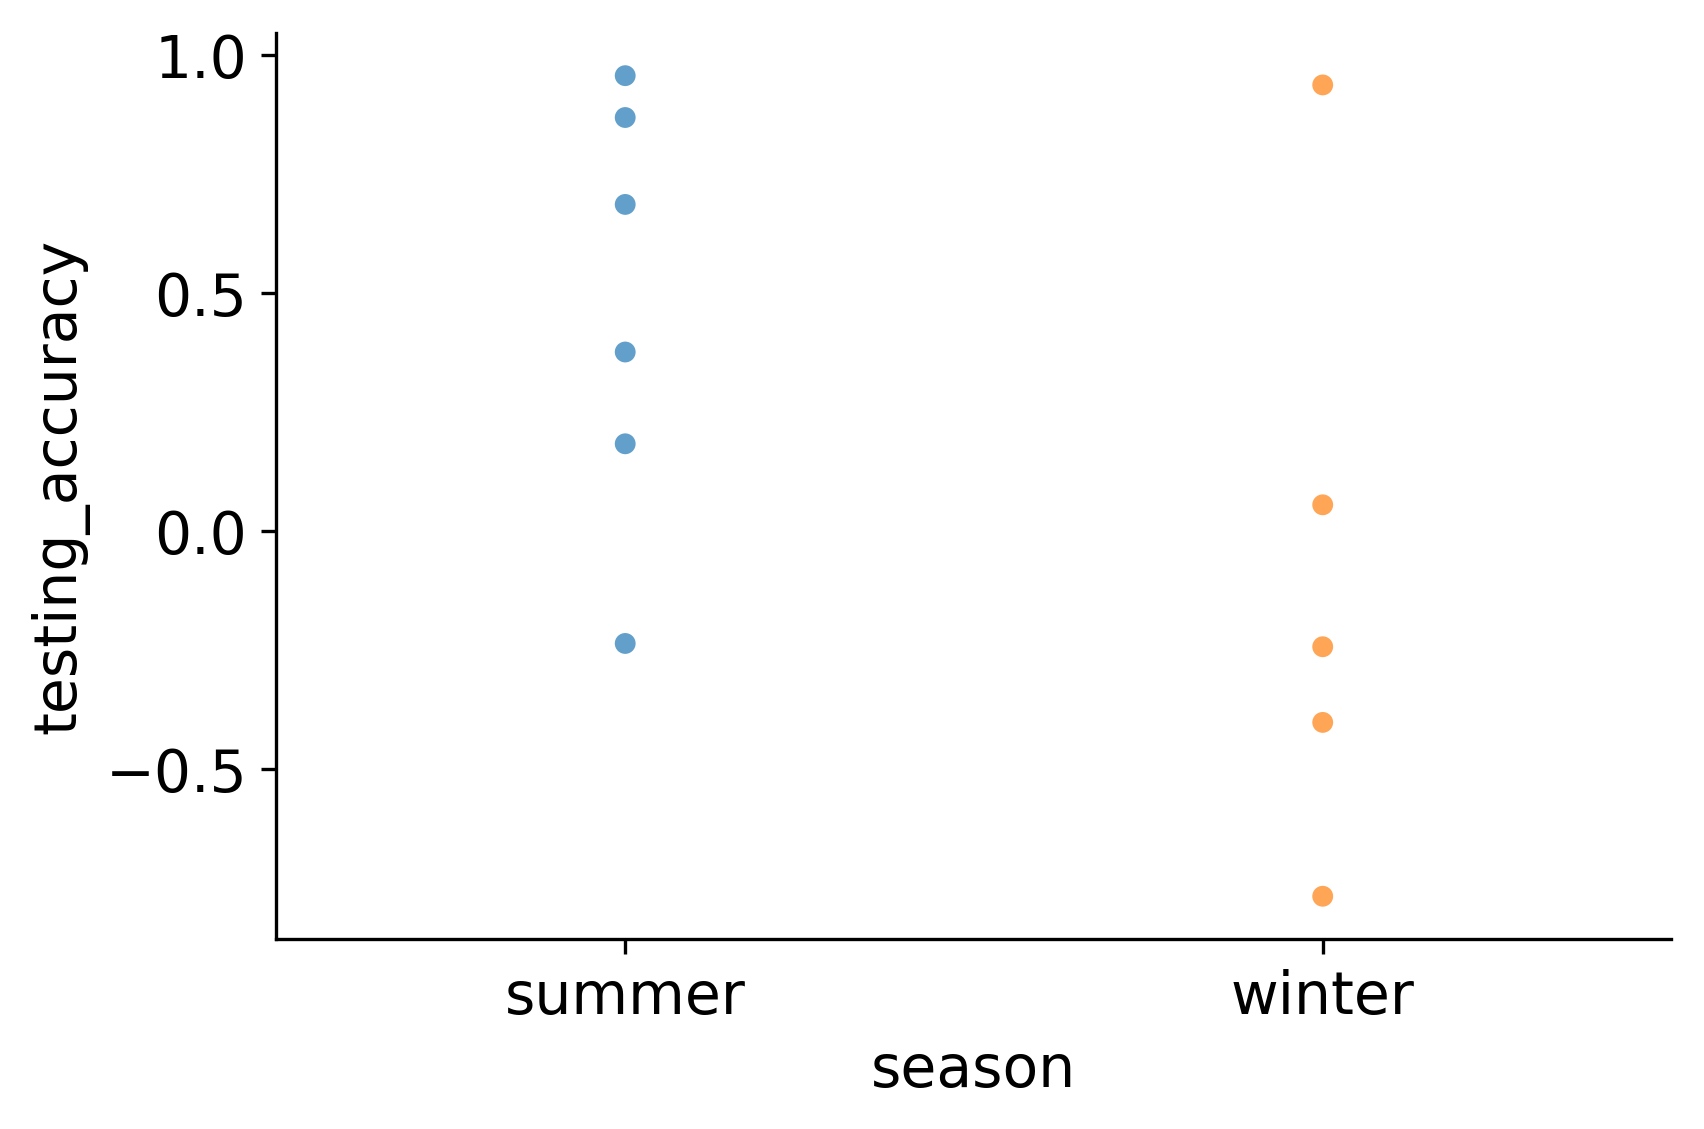

In [17]:
sns.swarmplot(x="season", y="testing_accuracy", data=df, alpha=0.7)

(0, 0.55370404556256525)

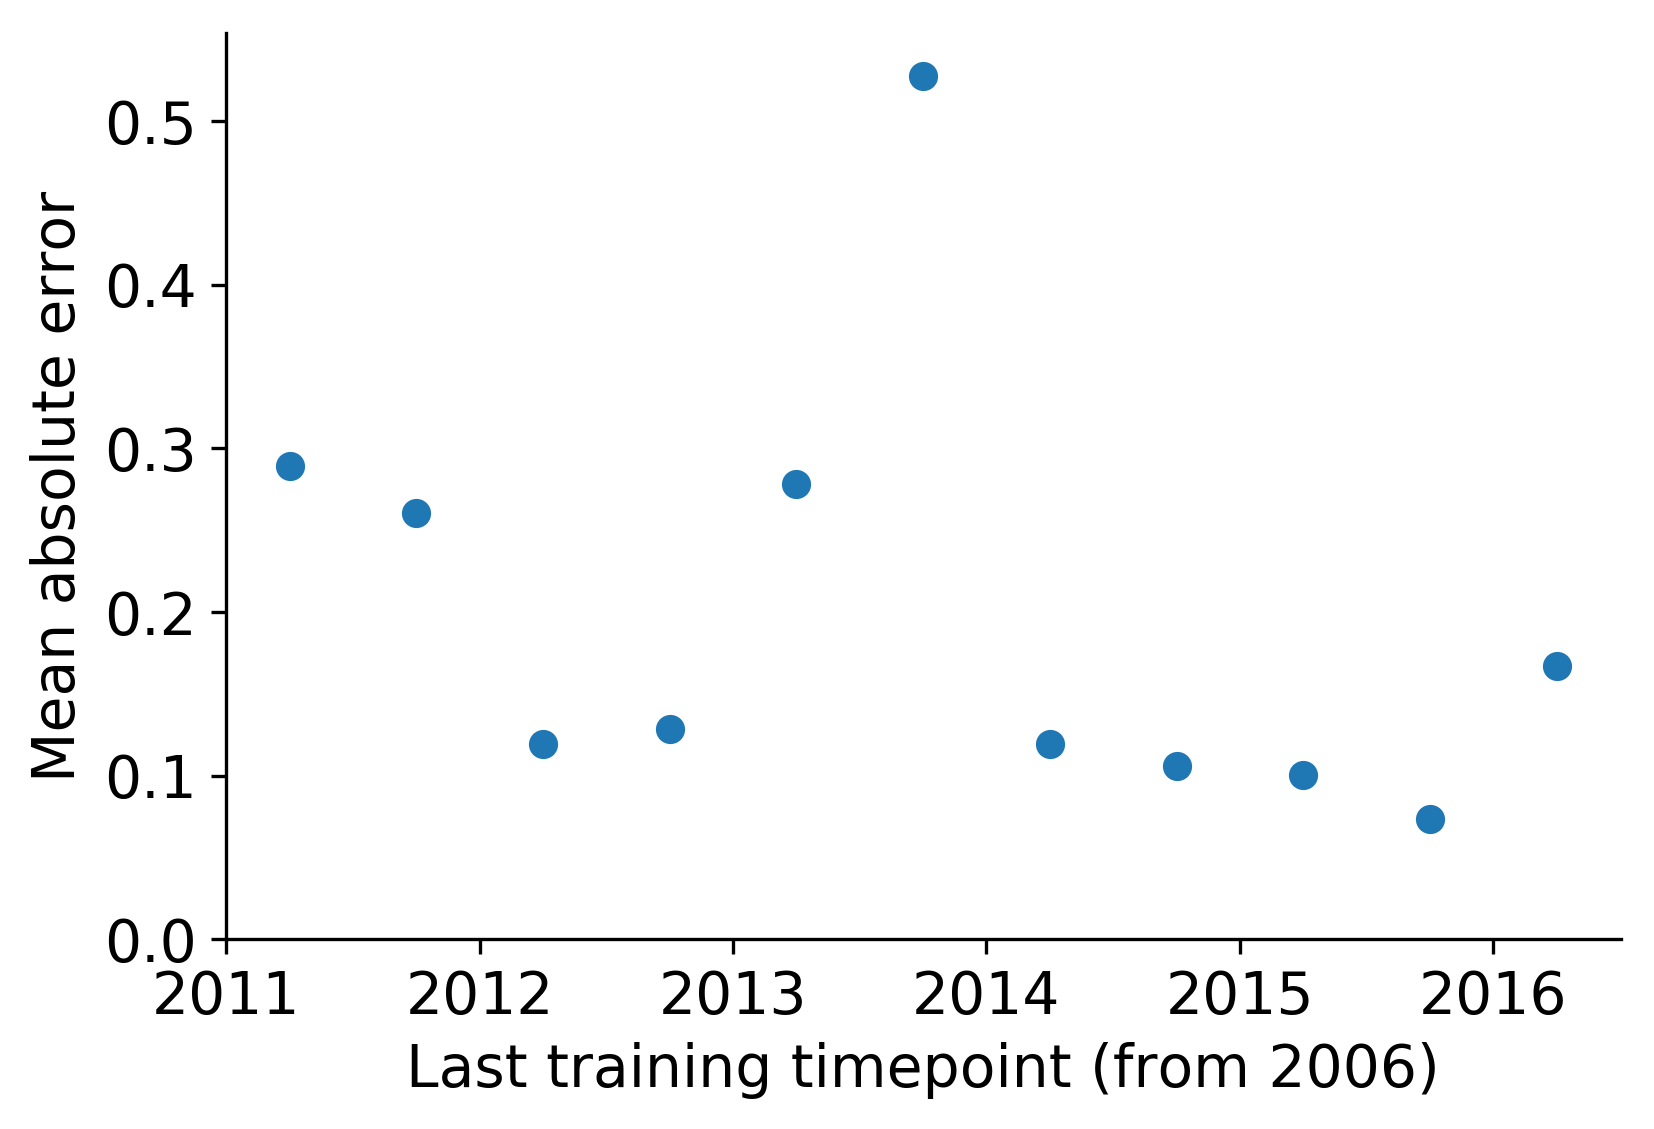

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["last_training_timepoint"], df["mae"])
ax.set_xlabel("Last training timepoint (from 2006)")
ax.set_ylabel("Mean absolute error")
ax.set_ylim(0)

(-1, 1)

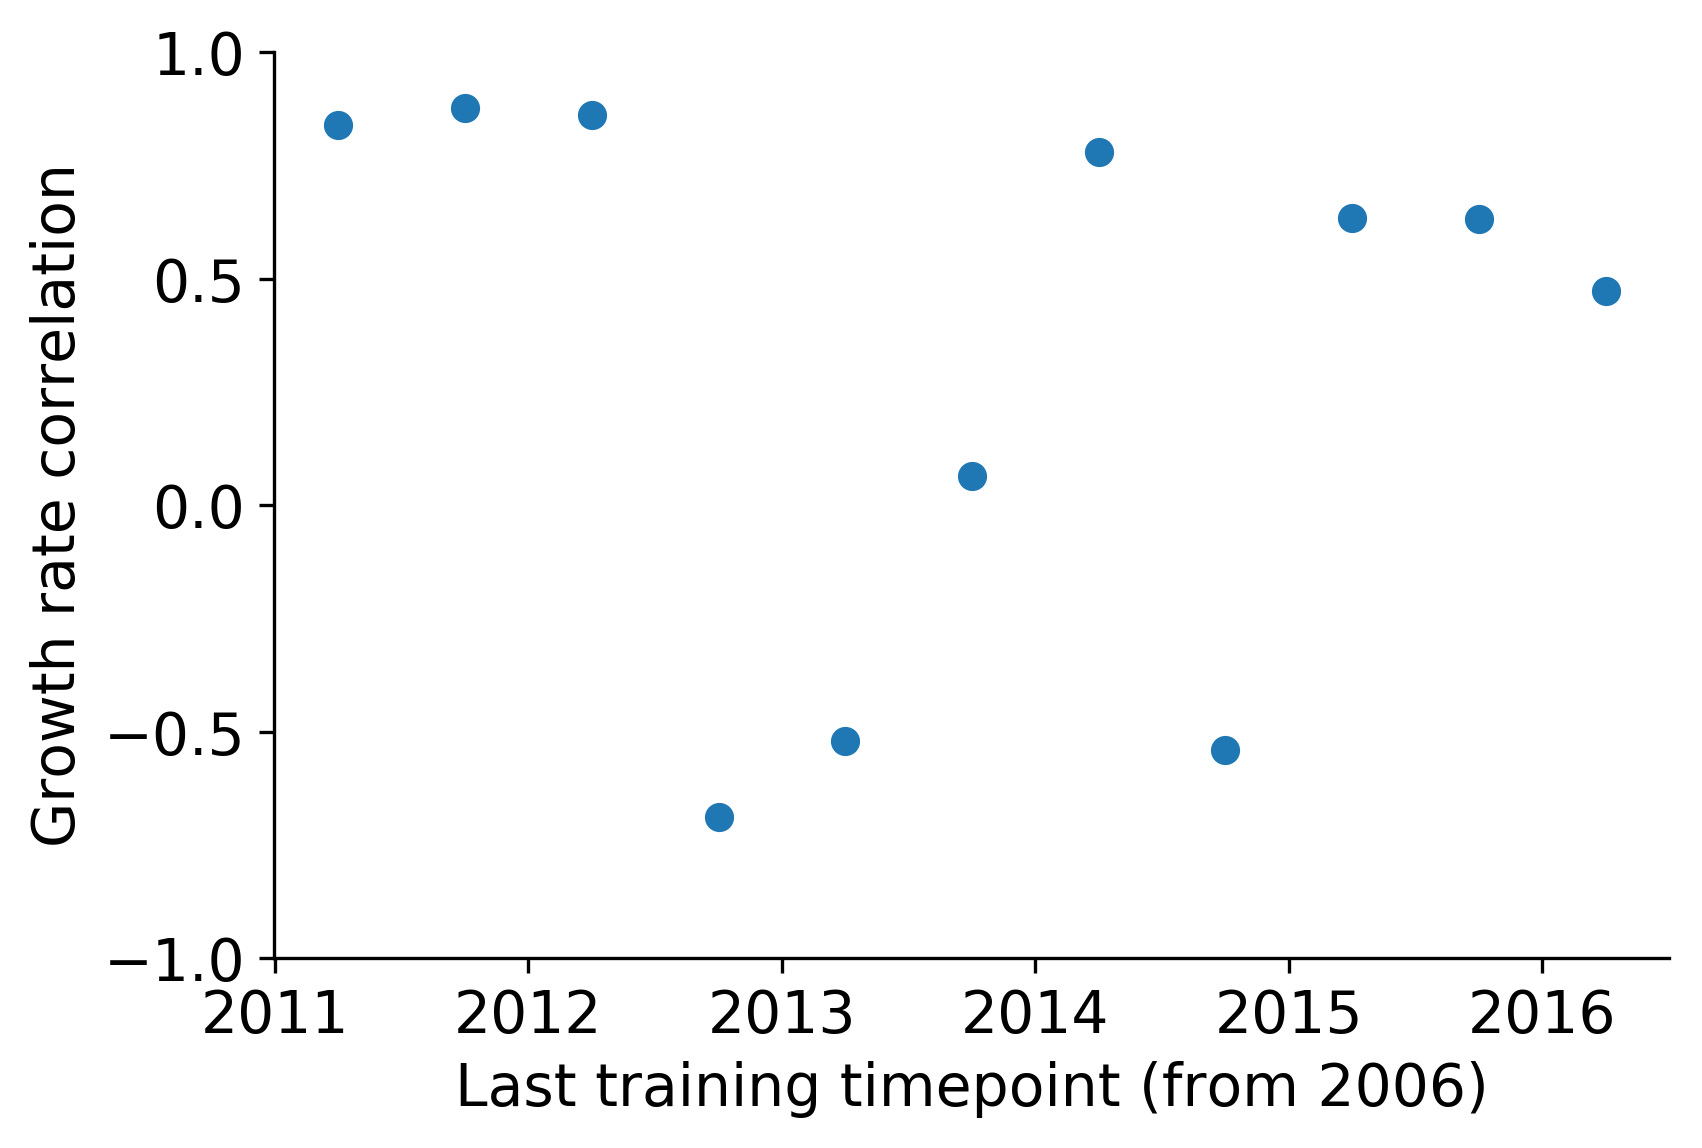

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df["last_training_timepoint"], df["testing_correlation"])
ax.set_xlabel("Last training timepoint (from 2006)")
ax.set_ylabel("Growth rate correlation")
ax.set_ylim(-1, 1)